In [1]:

import numpy as np

import torch

from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.model_selection import train_test_split

from src.config import *
from src.data import *
from src.models.efficientnet import EfficientNetB5Custom
from src.utils import *
from src.data import OriginalOAIDataset
from src.train import train, train_model, test_model
from src.trainers.classification import Classification


np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)




In [2]:
model_state = torch.load('models/OAI Mendeley/best_model_EfficientNetB5Custom_epoch_2.pt', map_location=torch.device('cpu'))
model = EfficientNetB5Custom(num_classes=5)
model.load_state_dict(model_state)

<All keys matched successfully>

In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_dataset = OriginalOAIDataset(mode='val',batch_size=5, transform=transform, local=True)

trainer =  Classification(model, device)

LOCAL MODE ENABLED


c:\Users\34658\AppData\Local\Programs\Python\Python310\lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


Test model EfficientNetB5Custom - Loss: 1.23, ACC: 0.73, AUC: 0.89, Sensivility: 0.73, Specificity: 0.70


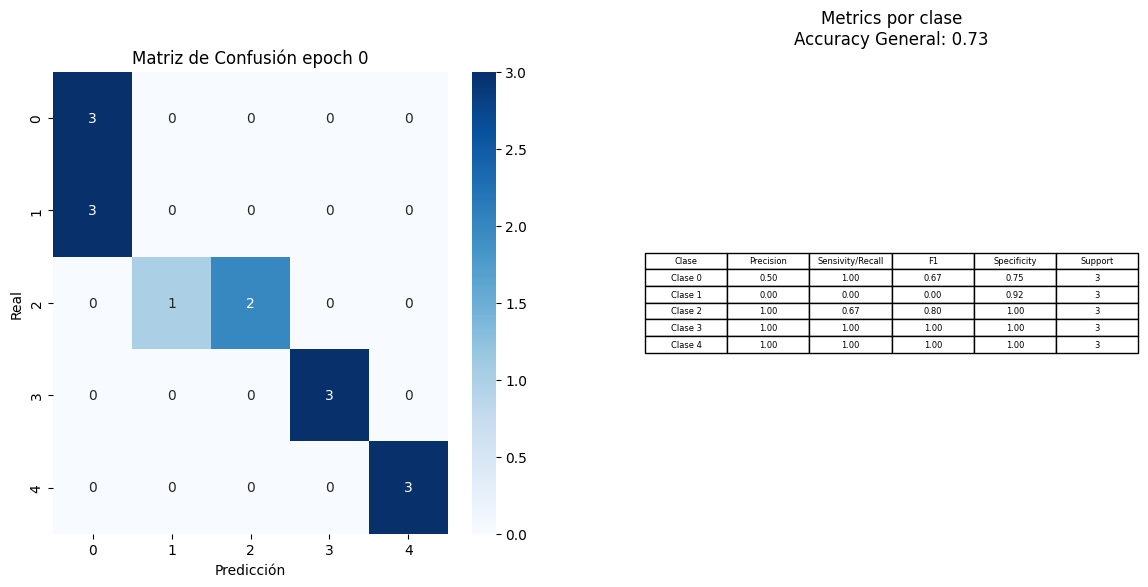

In [18]:
test_model(model, test_dataset.get_dataloader(), trainer, device, wdb=False)